1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

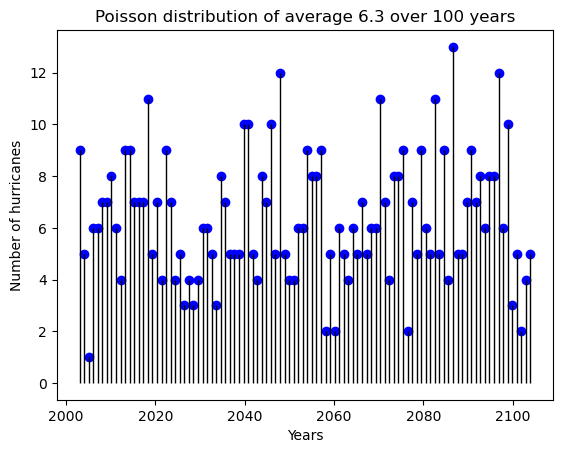

p-value < alpha? True


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

x0 = 15
mu = 6.3
std = math.sqrt(mu)
alpha =  0.022

#H0 --> the number of hurricanes in 2005 follows the historical average
#H1 --> the number of hurricanes in 2005 is greater than historical averagee

#plotting a Poisson distribution of average 6.3
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Years")
ax.set_ylabel("Number of hurricanes")
ax.set_title("Poisson distribution of average 6.3 over 100 years")

x = np.linspace(2003, 2104, 100)
y = stats.poisson.rvs(mu = 6.3, size = 100)
ax.plot(x, y,'bo')
ax.vlines(x, 0, y, colors='k', linestyles='-', lw=1)
plt.show()

#compute the Z score
Z = (x0 - mu) / std

pvalue = 1. - stats.norm.cdf(Z)

#computing prob that in a single year are observed 15 or more hurricances
prob_more = 1 - stats.poisson.cdf(k = 14, mu = mu)
#print("p-value=", prob_more)

print("p-value < alpha?", prob_more < alpha)

#Since it's less than the level of significance, we reject the null hypothesis.
#This means that the number of hurricanes in 2005 is signficantly larger than the other years

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [1]:
#define the data
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = 10

#calculate mean and variance
mean_pre = np.sum(pre) / 10
mean_post = np.sum(post) / 10

var_pre = (np.var(pre, ddof=1))
var_post = (np.var(post, ddof=1))

sigma = math.sqrt( (var_pre + var_post) / 2)

# calculate the T score with the test statistics
T = (mean_pre - mean_post ) / (sigma *  math.sqrt(2/10) ) 
print("T =", T)

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

#The level of significance is set by convention at 5% in several scientific fields
alpha = 0.05

print("p-value < alpha?", pvalue < alpha)

#Since the p-value is  <𝛼 we reject the null hypothesis, the change in blood pressures within our sample was not statistically significant.


T = -3.786997938137629
p-value = 0.004302464132864604
p-value < alpha? True


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

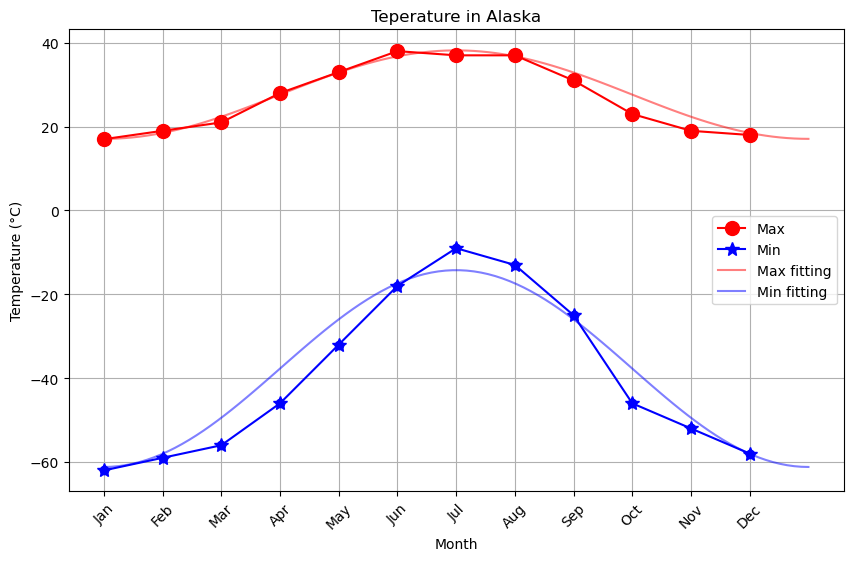

In [11]:
#plotting the data
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy import optimize


max_temp = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
m = np.arange(12)

plt.figure(figsize=(10,6))
plt.plot(month, max_temp, marker='o', markersize=10, color='red', label="Max")
plt.plot(month, min_temp, marker='*', markersize=10, color='blue', label = "Min")
plt.title("Teperature in Alaska")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid()

#fitting
def f(x, avg, ampl):
    return (avg + ampl * np.cos((x) * 2 * np.pi / x.max()))

popt_max, pcov_max = optimize.curve_fit(f, m, max_temp)
popt_min, pcov_min = optimize.curve_fit(f, m, min_temp)

x = np.linspace(0, 12, num=100)

plt.plot(m, max_temp, 'ro')
plt.plot(x, f(x, *popt_max), 'r-', alpha = 0.5, label="Max fitting")
plt.plot(m, min_temp, 'bo')
plt.plot(x, f(x, *popt_min), 'b-', alpha = 0.5, label="Min fitting" )
plt.legend()

plt.show()

#Has been obtained a resonable fit.
#the time offset for min and max temperatures it's not the same.


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

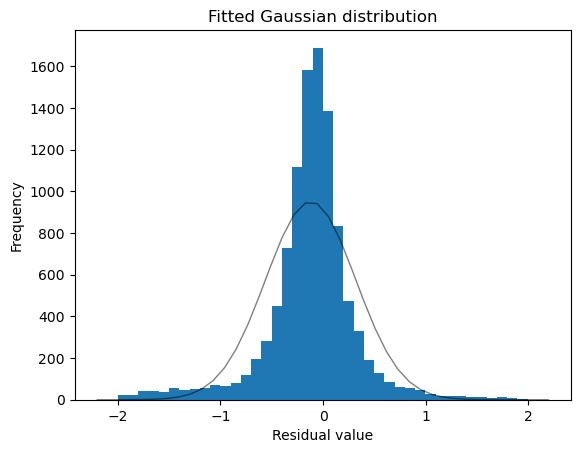

n degrees of freedom = 39
chi2 = 2214.882866179317
p-value = 0.0


In [38]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


filename = "data/residuals_261.pkl"

df = pd.read_pickle(filename, compression = 'infer')
df_list = df.tolist()

residuals = np.array(df_list['residuals'])

#clean the sample ("residual" smaller than 2)
mask = abs(residuals) < 2
filt_data = residuals[mask]

residuals = filt_data

num_bins = 40

#create an histogram with the appropriate binning and plot it

#the content of each 𝑖-th bin should be statistically significant, 
#i.e. the corresponding Poisson uncertainty, 1/√𝑛𝑖 should be small compared to  𝑛𝑖

fig, ax = plt.subplots()
n, bins, patches = ax.hist(residuals, num_bins)

#calculate the poisson uncertainty
pois_unc = 1 / np.sqrt (n)
check = pois_unc < n

#print(np.sum(check))
#print(pois_unc.shape)
#print( "%", np.sum(check) / pois_unc.shape)

# add a 'best fit' line
mu, sigma = stats.norm.fit(residuals)

dx = bins[1] - bins[0]
scale = len(residuals)*dx

# plot Gaussian fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(n))
y = stats.norm.pdf(x, mu, sigma)*scale
ax.plot(x, y, 'k', linewidth=1, alpha = 0.5)
ax.set_title("Fitted Gaussian distribution")
ax.set_xlabel("Residual value")
ax.set_ylabel("Frequency")

plt.show()

#Perform the  𝜒2 goodness-of-fit test

# set the number of degrees of freedom
ndof = len(n) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
sigma_n = np.sqrt(np.abs(n))

chi2 = np.sum(((n - (y))**2) / sigma_n**2)
print("chi2 =", chi2)

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Best fit values: [-9.99725715 12.32443981  9.25397671]
Uncertanties:  [0.12185013 0.01219857 0.0861972 ]
Overall average temperature in Munich[°C]:  9.260533295547697
Daily values predicted for the coldest time of the year: -0.743280415586721
Daily values predicted for the hottest time of the year: 19.251233852071294


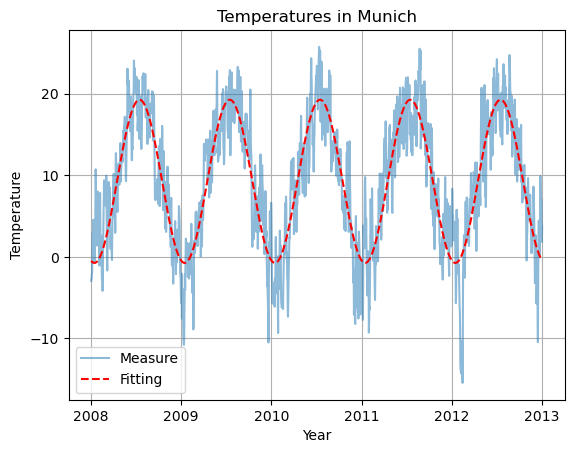

In [14]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
from scipy import optimize

data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
year, temperature = data.T

#filter the  year data
mask = (year > 2007.99932) & (year < 2013.00205) & (temperature < 40)
filt_year = year[mask]
filt_temp = temperature[mask]

fig, ax = plt.subplots()

# plot Gaussian fit
ax.plot(filt_year, filt_temp, alpha = 0.5, label = "Measure")
ax.set_title("Temperatures in Munich")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature")

#fitting the data 

#define the function
# amp = A

def f(time, a, b, c):
    return (a * np.cos(2 * np.pi * time + b) + c)

popt, pcov = optimize.curve_fit(f, filt_year, filt_temp)

a, b, c = popt

print("Best fit values:", popt)
print("Uncertanties: ", np.sqrt(np.diag(pcov)))
print("Overall average temperature in Munich[°C]: ", f(x, a, b, c).mean() )

#the b parameter represent the offset w.r.t. the x 

#typical daily average values predicted by the model for the coldest and hottest time of year
prediction = f(x, a, b, c)

print("Daily values predicted for the coldest time of the year:", prediction.min())
print("Daily values predicted for the hottest time of the year:", prediction.max())

x = np.linspace(min(filt_year), max(filt_year), 100000)

ax.plot(x, f(x, a, b, c), '--', color = "red",label="Fitting")
plt.legend()

plt.grid()
plt.show()
